In [2]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

In [3]:
df = pd.read_csv('WildBlueberryPollinationSimulationData.csv')

In [14]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 777 Columns: 18


In [15]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [5]:
df.head()

Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0     0       37.5      0.75     0.25     0.25   0.25              86.0   
1     1       37.5      0.75     0.25     0.25   0.25              86.0   
2     2       37.5      0.75     0.25     0.25   0.25              94.6   
3     3       37.5      0.75     0.25     0.25   0.25              94.6   
4     4       37.5      0.75     0.25     0.25   0.25              86.0   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              52.0                  71.9              62.0              30.0   
1              52.0                  71.9              62.0              30.0   
2              57.2                  79.0              68.2              33.0   
3              57.2                  79.0              68.2              33.0   
4              52.0                  71.9              62.0              30.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  50.8         16.0                0.26  0.410652   0.408159   
1                  50.8          1.0                0.10  0.444254   0.425458   
2                  55.9         16.0                0.26  0.383787   0.399172   
3                  55.9          1.0                0.10  0.407564   0.408789   
4                  50.8         24.0                0.39  0.354413   0.382703   

       seeds        yield  
0  31.678898  3813.165795  
1  33.449385  4947.605663  
2  30.546306  3866.798965  
3  31.562586  4303.943030  
4  28.873714  3436.493543

In [6]:
df.tail()

Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
772   772       10.0     0.537    0.117    0.409  0.058              86.0   
773   773       40.0     0.537    0.117    0.409  0.058              86.0   
774   774       20.0     0.537    0.117    0.409  0.058              86.0   
775   775       20.0     0.537    0.117    0.409  0.058              89.0   
776   776       20.0     0.537    0.117    0.409  0.058              89.0   

     MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
772              52.0                  71.9              62.0   
773              52.0                  71.9              62.0   
774              52.0                  71.9              62.0   
775              39.0                  65.6              66.0   
776              39.0                  65.6              66.0   

     MinOfLowerTRange  AverageOfLowerTRange  RainingDays  AverageRainingDays  \
772              30.0                  50.8         3.77                0.06   
773              30.0                  50.8         3.77                0.06   
774              30.0                  50.8        24.00                0.39   
775              28.0                  45.3         3.77                0.06   
776              28.0                  45.3        24.00                0.39   

     fruitset  fruitmass      seeds        yield  
772  0.486815   0.428012  33.447471  5333.873335  
773  0.342841   0.377915  28.462005  3373.436842  
774  0.404617   0.401670  30.748240  4203.027624  
775  0.401538   0.399935  30.582161  4166.299735  
776  0.384646   0.392303  29.742583  3943.131681

In [17]:
# Statistical summary
df.describe().T

count         mean          std          min  \
Row#                  777.0   388.000000   224.444871     0.000000   
clonesize             777.0    18.767696     6.999063    10.000000   
honeybee              777.0     0.417133     0.978904     0.000000   
bumbles               777.0     0.282389     0.066343     0.000000   
andrena               777.0     0.468817     0.161052     0.000000   
osmia                 777.0     0.562062     0.169119     0.000000   
MaxOfUpperTRange      777.0    82.277091     9.193745    69.700000   
MinOfUpperTRange      777.0    49.700515     5.595769    39.000000   
AverageOfUpperTRange  777.0    68.723037     7.676984    58.200000   
MaxOfLowerTRange      777.0    59.309395     6.647760    50.200000   
MinOfLowerTRange      777.0    28.690219     3.209547    24.300000   
AverageOfLowerTRange  777.0    48.613127     5.417072    41.200000   
RainingDays           777.0    18.309292    12.124226     1.000000   
AverageRainingDays    777.0     0.320000     0.171279     0.060000   
fruitset              777.0     0.502121     0.079445     0.192732   
fruitmass             777.0     0.445983     0.040333     0.311921   
seeds                 777.0    36.122432     4.377889    22.079199   
yield                 777.0  6012.849165  1356.955318  1637.704022   

                              25%          50%          75%          max  
Row#                   194.000000   388.000000   582.000000   776.000000  
clonesize               12.500000    12.500000    25.000000    40.000000  
honeybee                 0.250000     0.250000     0.500000    18.430000  
bumbles                  0.250000     0.250000     0.380000     0.585000  
andrena                  0.380000     0.500000     0.630000     0.750000  
osmia                    0.500000     0.630000     0.750000     0.750000  
MaxOfUpperTRange        77.400000    86.000000    89.000000    94.600000  
MinOfUpperTRange        46.800000    52.000000    52.000000    57.200000  
AverageOfUpperTRange    64.700000    71.900000    71.900000    79.000000  
MaxOfLowerTRange        55.800000    62.000000    66.000000    68.200000  
MinOfLowerTRange        27.000000    30.000000    30.000000    33.000000  
AverageOfLowerTRange    45.800000    50.800000    50.800000    55.900000  
RainingDays              3.770000    16.000000    24.000000    34.000000  
AverageRainingDays       0.100000     0.260000     0.390000     0.560000  
fruitset                 0.454725     0.508297     0.561297     0.652144  
fruitmass                0.416281     0.445587     0.476149     0.535660  
seeds                   33.116091    36.166044    39.239668    46.585105  
yield                 5124.854901  6107.382466  7022.189731  8969.401842

In [9]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [11]:
# checking duplicates
df.duplicated().sum()

0

In [18]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

Row#                    0.0 %
clonesize               0.0 %
honeybee                0.0 %
bumbles                 0.0 %
andrena                 0.0 %
osmia                   0.0 %
MaxOfUpperTRange        0.0 %
MinOfUpperTRange        0.0 %
AverageOfUpperTRange    0.0 %
MaxOfLowerTRange        0.0 %
MinOfLowerTRange        0.0 %
AverageOfLowerTRange    0.0 %
RainingDays             0.0 %
AverageRainingDays      0.0 %
fruitset                0.0 %
fruitmass               0.0 %
seeds                   0.0 %
yield                   0.0 %
dtype: object

In [19]:
df.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [21]:
df.nunique()

Row#                    777
clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

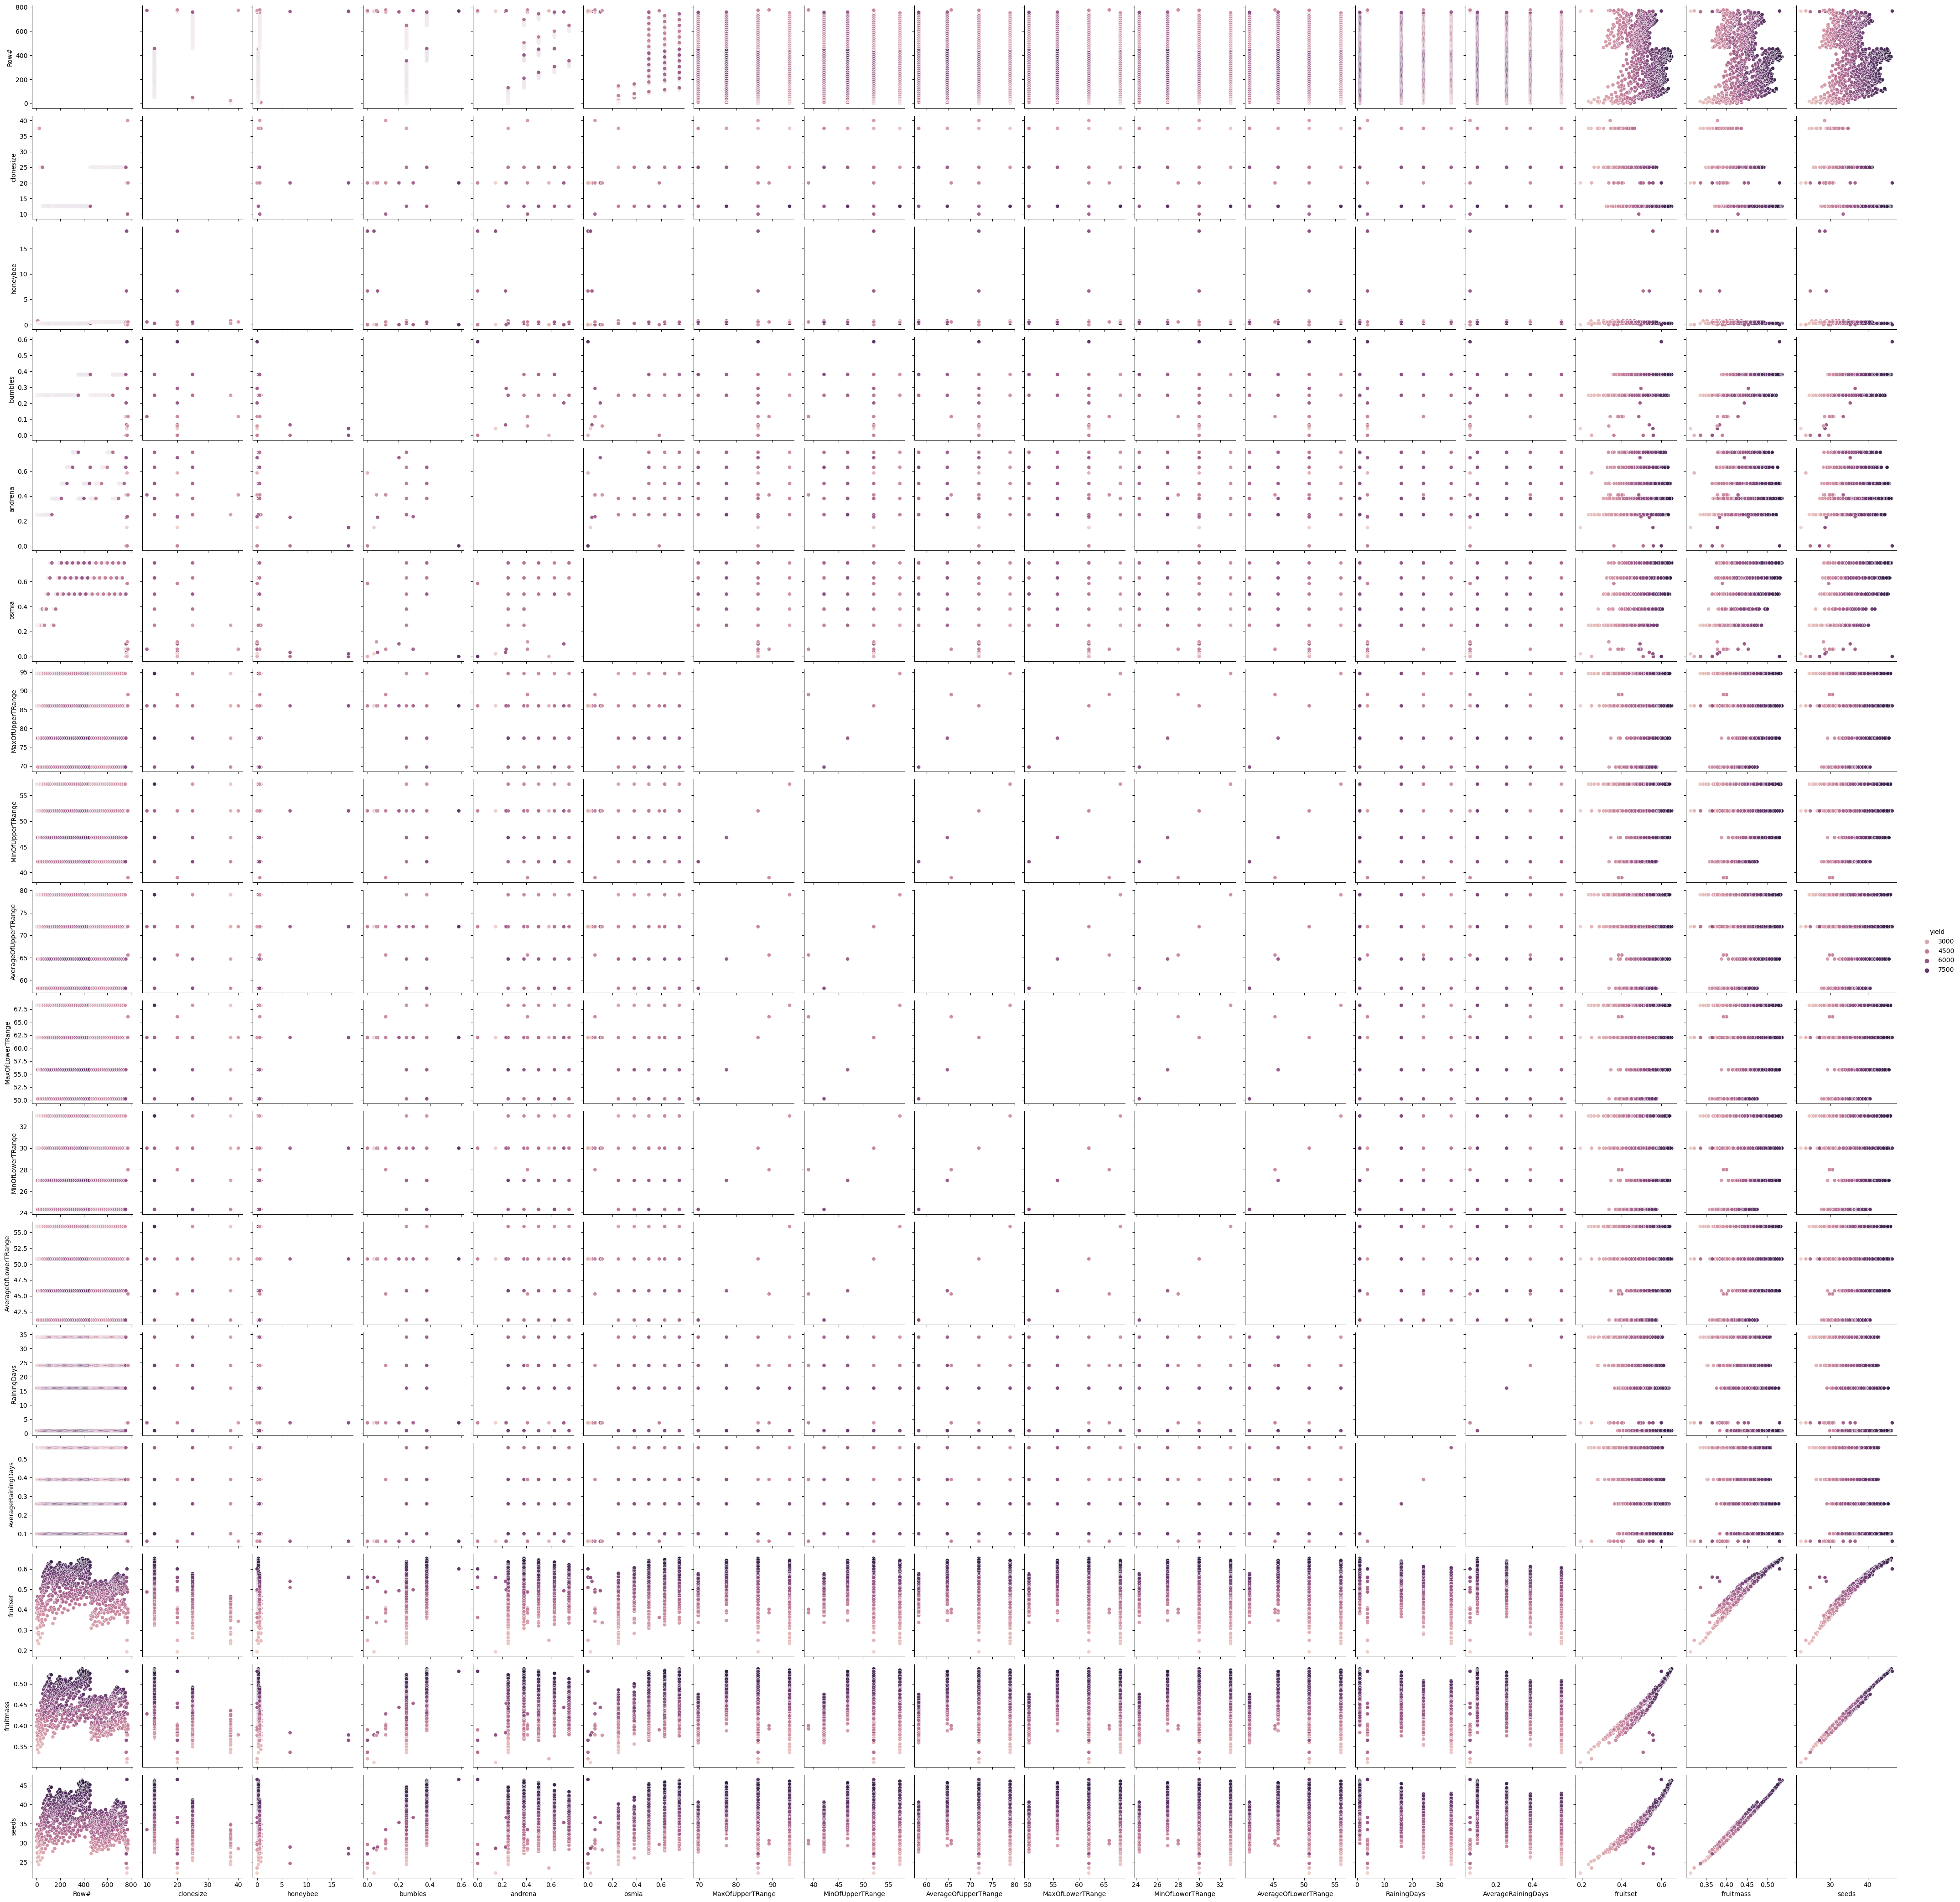

In [24]:
# Creating a pairplot of dataset
sns.pairplot(df,hue='yield')
plt.show()

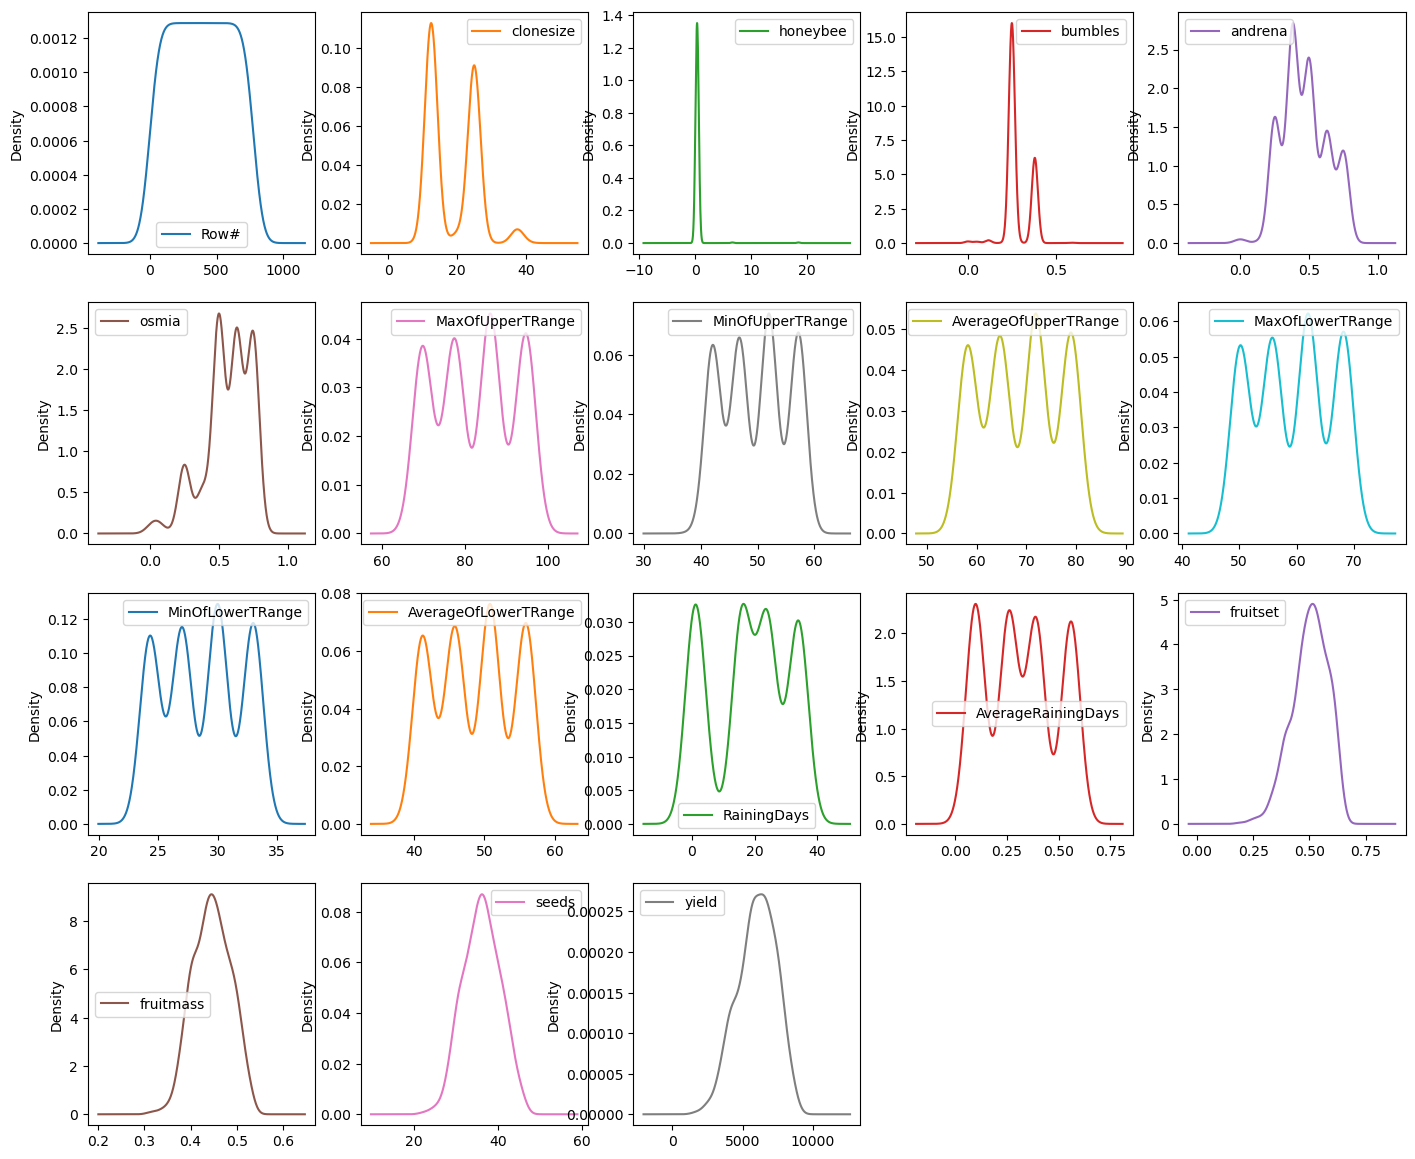

In [27]:
df.plot(kind="density", 
                subplots=True, 
                layout = (6,5), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

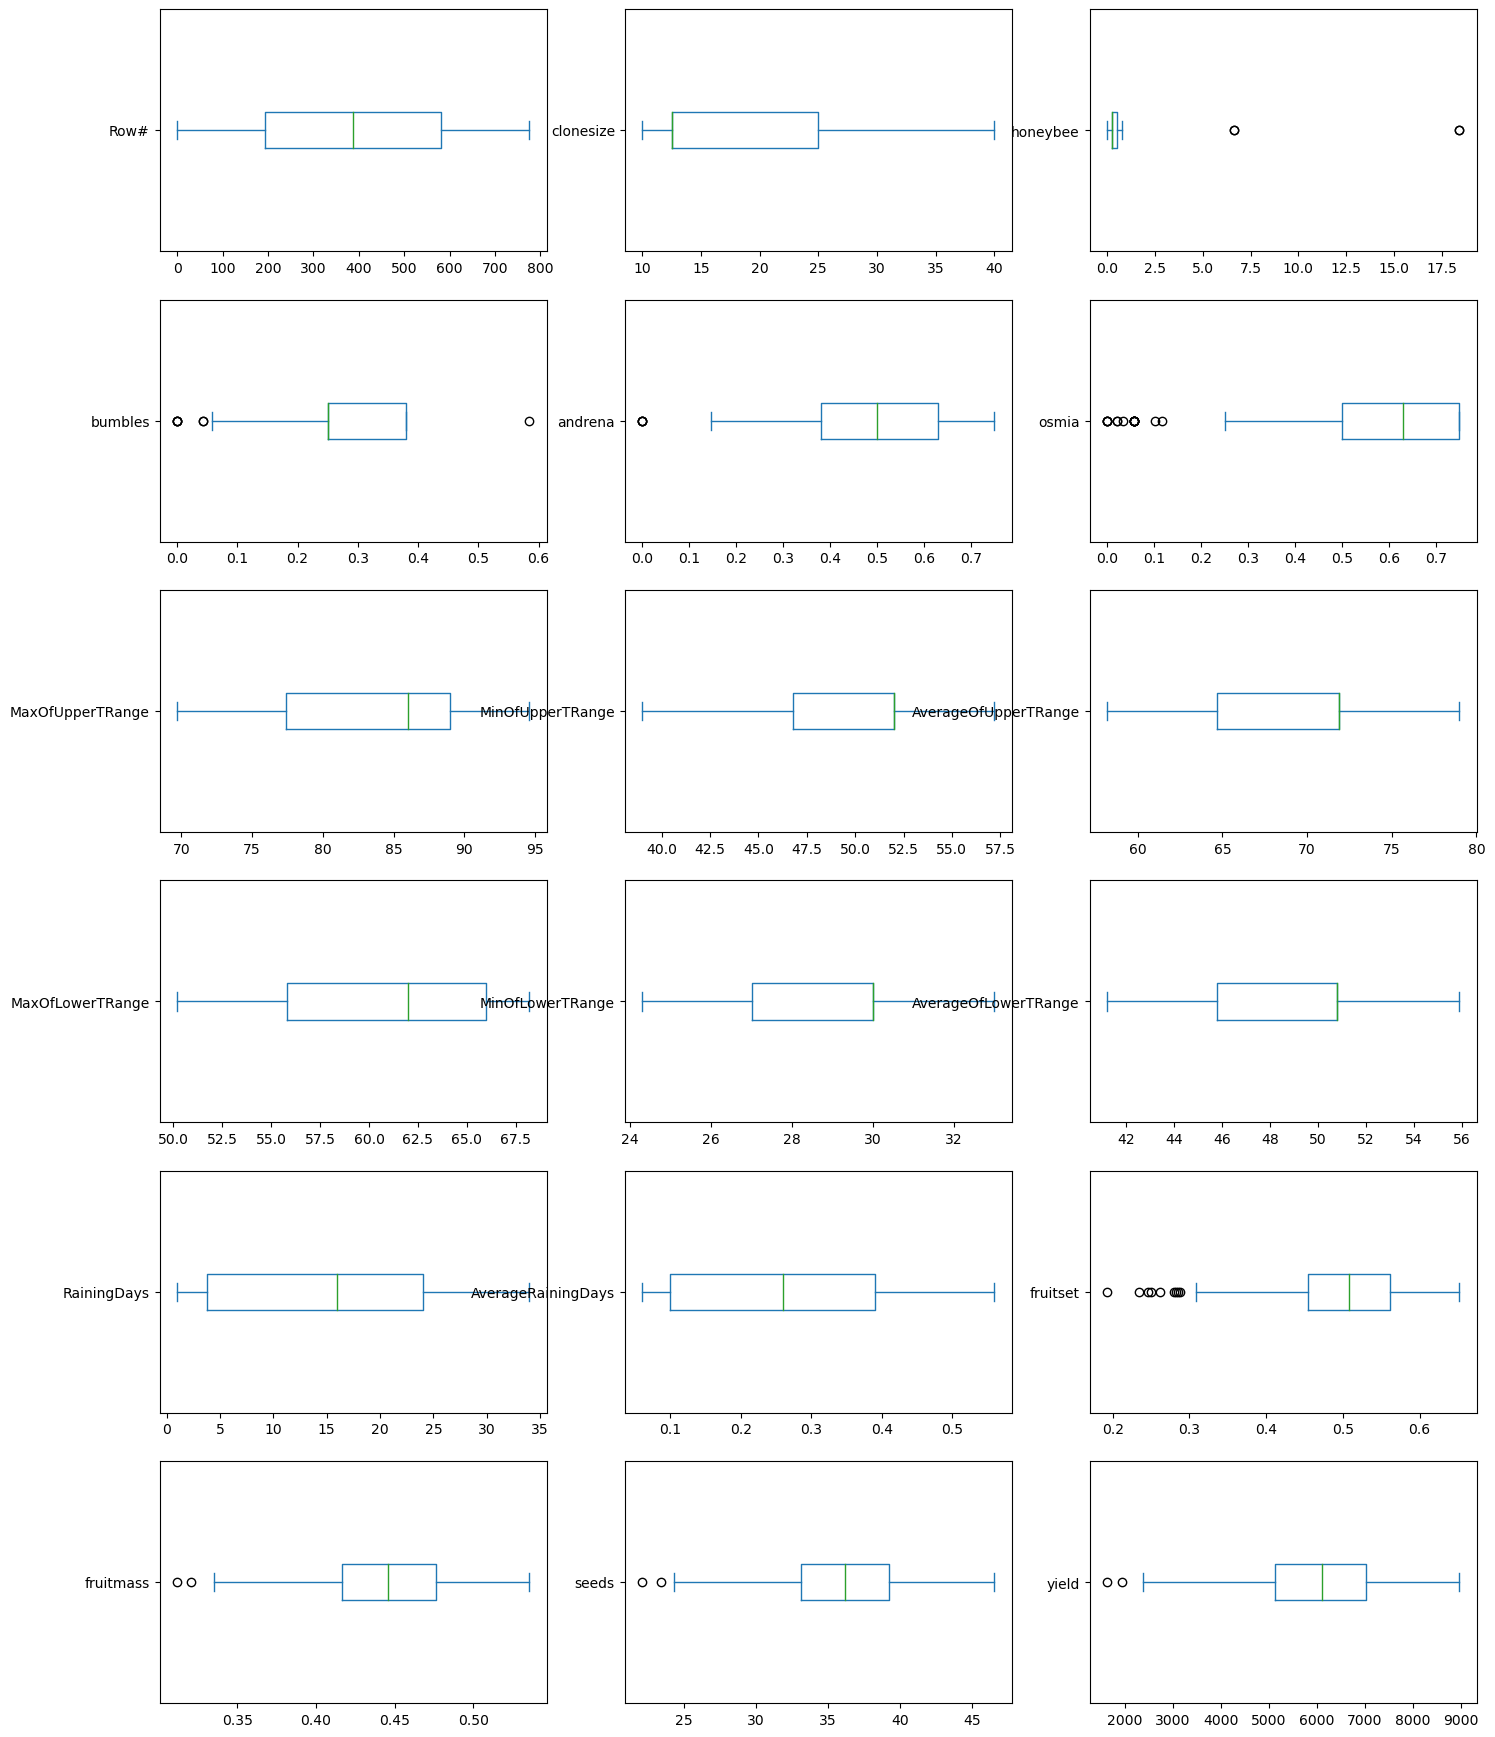

In [28]:
df.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

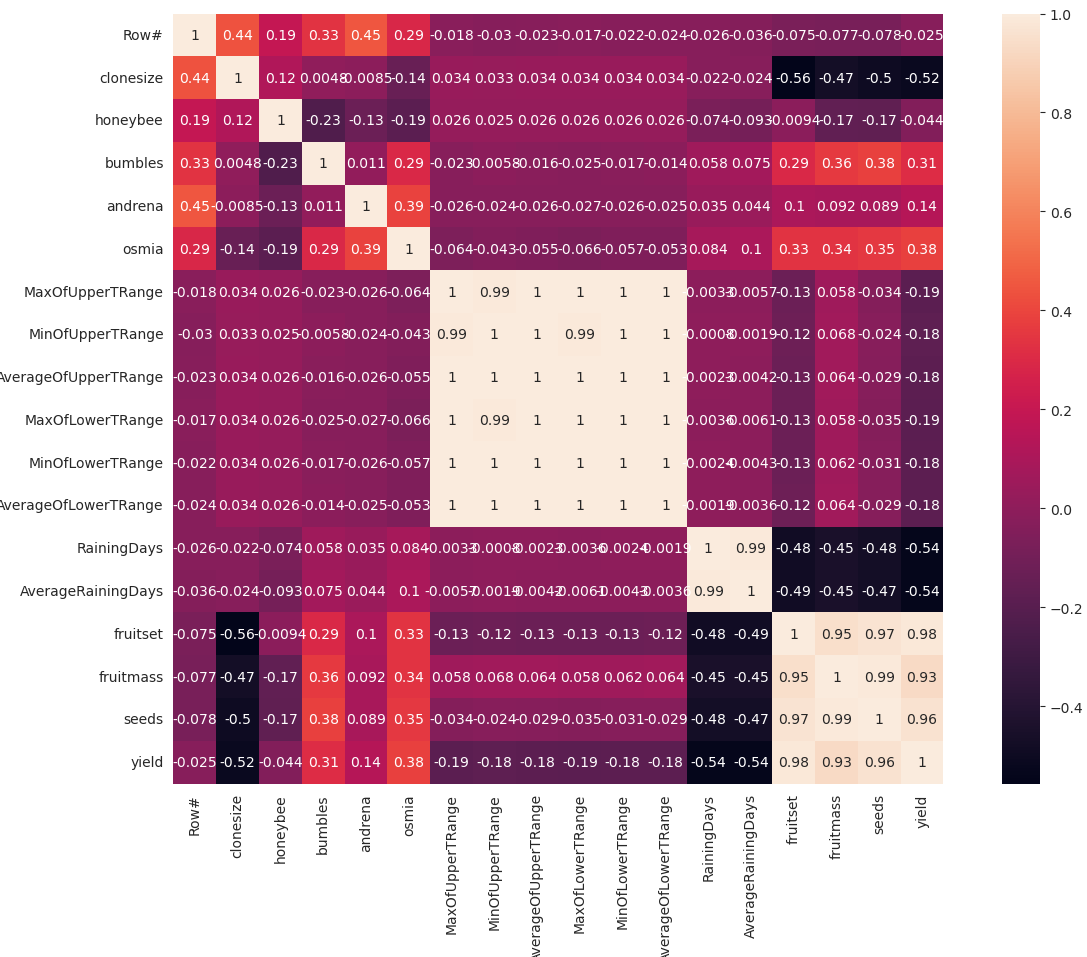

In [29]:
corr = df.corr(method='pearson')

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, square=True,annot=True)
plt.show()

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
  
columns to drop: 'Row#', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee'

We cannot keep fruitmass, fruitset and seeds as well. they are the derivatives of the output and cannot be considered for training.

In [33]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [34]:
bbry_data_process = df.drop(columns=['Row#', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee', "fruitset", "fruitmass", "seeds"])
bbry_data_process

clonesize  bumbles  andrena  osmia  AverageOfUpperTRange  \
0         37.5    0.250    0.250  0.250                  71.9   
1         37.5    0.250    0.250  0.250                  71.9   
2         37.5    0.250    0.250  0.250                  79.0   
3         37.5    0.250    0.250  0.250                  79.0   
4         37.5    0.250    0.250  0.250                  71.9   
..         ...      ...      ...    ...                   ...   
772       10.0    0.117    0.409  0.058                  71.9   
773       40.0    0.117    0.409  0.058                  71.9   
774       20.0    0.117    0.409  0.058                  71.9   
775       20.0    0.117    0.409  0.058                  65.6   
776       20.0    0.117    0.409  0.058                  65.6   

     AverageOfLowerTRange  AverageRainingDays        yield  
0                    50.8                0.26  3813.165795  
1                    50.8                0.10  4947.605663  
2                    55.9                0.26  3866.798965  
3                    55.9                0.10  4303.943030  
4                    50.8                0.39  3436.493543  
..                    ...                 ...          ...  
772                  50.8                0.06  5333.873335  
773                  50.8                0.06  3373.436842  
774                  50.8                0.39  4203.027624  
775                  45.3                0.06  4166.299735  
776                  45.3                0.39  3943.131681  

[777 rows x 8 columns]

In [43]:
Q1 = bbry_data_process.quantile(0.25)
Q3 = bbry_data_process.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


clonesize                 12.50000
bumbles                    0.13000
andrena                    0.25000
osmia                      0.25000
AverageOfUpperTRange       7.20000
AverageOfLowerTRange       5.00000
AverageRainingDays         0.29000
yield                   1897.33483
dtype: float64


# <span style="font-family:cursive;text-align:center">🔘 Feature Selection</span>

In [46]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [47]:
X = bbry_data_process.drop(["yield"], axis=1)
y = bbry_data_process['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

# <span style="font-family:cursive;text-align:center">🧰 Modelling</span> 

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
We will now train the model on top 7 features, using both the splits of dataset, <br>and check the metrics of the same on  4 Models:

* Linear Regression
* Random Forest
* Decision Tree
* XGBoost

##Selected corr

In [74]:
X = bbry_data_process.drop(["yield"], axis=1)
y = bbry_data_process['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)



X_train_fs, X_test_fs, fs_corr = select_features_corr_based(X_train, y_train, X_test, x=7)

### <span style="font-family:cursive;text-align:center">LinearRegression</span>

In [75]:
lreg = LinearRegression()

lreg.fit(X_train_fs, y_train)

yhat = lreg.predict(X_test_fs)

In [76]:
mae_linear = mean_absolute_error(y_test, yhat)
mse_linear = mean_squared_error(y_test, yhat)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 533.084
MSE: 409591.357
RMSE: 639.993
R-Square: 0.791


### <span style="font-family:cursive;text-align:center">RandomForest Regression</span>

In [77]:
rf = RandomForestRegressor()

rf.fit(X_train_fs, y_train)
    
yhat = rf.predict(X_test_fs)

In [78]:
mae_rf = mean_absolute_error(y_test, yhat)
mse_rf = mean_squared_error(y_test, yhat)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 247.067
MSE: 216779.714
RMSE: 465.596
R-Square: 0.889


### <span style="font-family:cursive;text-align:center">Decision Tree Regression</span>

In [79]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs, y_train)

yhat = dtree.predict(X_test_fs)

In [80]:
mae_dt = mean_absolute_error(y_test, yhat)
mse_dt = mean_squared_error(y_test, yhat)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 309.797
MSE: 392208.010
RMSE: 626.265
R-Square: 0.800


### <span style="font-family:cursive;text-align:center">XGBRegression</span>

In [81]:
xgb = XGBRegressor()

xgb.fit(X_train_fs, y_train)

yhat = xgb.predict(X_test_fs)

In [82]:
mae_xgb = mean_absolute_error(y_test, yhat)
mse_xgb = mean_squared_error(y_test, yhat)
rmse_xgb = np.sqrt(mse_dt)
rsq_xgb = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 245.853
MSE: 308923.942
RMSE: 626.265
R-Square: 0.842


# <span style="font-family:cursive;text-align:center">Model Evaluation</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

We can also check the R<sup>2</sup> score. Here, we will be aiming to reduce the <b>RMSE</b> and <b> MAE </b> values.
The comparative BarPlot shows the values of each.

In [84]:
# CV evaluation for all the models
# from sklearn.metrics import r2_score

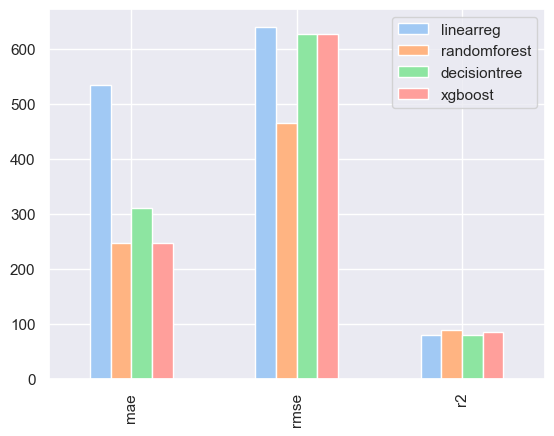

In [85]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

# <span style="font-family:cursive;text-align:center">Hyperparameter Tuning</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
crossvalidation, RepeatedKFold and GridSearchCV are the popular methods for Parameter Tuning. We have only tuned the model for K values, plus an addition model parameter. With greater processor, the tuning can afford to produce folds 3 times over 4 parameter values.
    
>Another alternative is:
> <b> TuneSearchCV </b>

In [86]:
cv = RepeatedKFold(n_splits= 50, n_repeats = 3, random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)


# define pipeline for each algorithm
# define GSCV for each
# loop through it

# pipe = Pipeline ([(preprocessing: scaling), (FS: selectKBEST), (modelling: model)])


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

# pipe_lr.get_params().keys()

In [87]:

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        'model__max_depth': [15, 18, 10],
        'model__min_samples_split': [15, 18, 10]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
                     'model__max_depth': [15, 18, 10],
                     'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
                    'model__max_depth': [9,12],
                   'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]


# estimator (model), parameter (model), scoring

# def custom_metric(values):
#     #calculate metric
#     return metric_value

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Linear Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [ ]:
# store the error values in a dataframe and plot as evaluation visualization also see boosted DTree and R2 square values

In [88]:
# Start form initial scaled model: X_train17 and X_test17, y_train17 and y_test17
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs, y_train)
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    
    return (grid_dict[best_regr], best_gs, least_mae)

# <span style="font-family:cursive;text-align:center">Prediction and Evaluation</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
**Running the GridSearchCV and saving the best model.**

In [93]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Linear Regression
Best Config: {'sel__k': 2}
Best MAE: -658.106
Test set mean absolute error for best params: 734.554 
Test set root mean squared error for best params: 27.103 

Estimator: Random Forest
Best Config: {'model__max_depth': 15, 'model__min_samples_split': 15, 'sel__k': 2}
Best MAE: -625.975
Test set mean absolute error for best params: 673.770 
Test set root mean squared error for best params: 25.957 

Estimator: XGBoost
Best Config: {'model__max_depth': 9, 'model__min_child_weight': 8, 'model__subsample': 0.9, 'sel__k': 2}
Best MAE: -623.109
Test set mean absolute error for best params: 673.822 
Test set root mean squared error for best params: 25.958 

Estimator: Decision Tree
Best Config: {'model__max_depth': 15, 'model__max_features': 'sqrt', 'sel__k': 2}
Best MAE: -623.214
Test set mean absolute error for best params: 673.038 
Test set root mean squared error for best params: 25.943 

Classifier with least test set MAE: De

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    
Although DT is the best of the listed models, <b>RandomForest</b> would be a simple model hence I would retune it in addition to the best params extracted in the first search

In [94]:
grid_params_rf1 = [{
        'model__max_depth': [15, 18, 10],
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=7)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='squared_error'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 15, 'model__min_samples_split': 2}
Best MAE: -225.451
Test set mean absolute error for best params: 241.899 
Test set root mean squared error for best params: 15.553 


In [102]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
best_param_model = RF1.best_estimator_

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

<b>Prediction error Plot:</b>
A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.


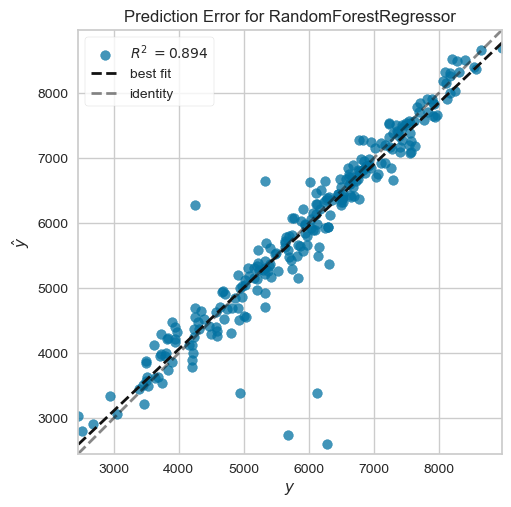

In [103]:
visualizer = PredictionError(best_param_model)
visualizer.fit(X_train_fs, y_train)
visualizer.score(X_test_fs, y_test)
visualizer.show()
plt.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

<b>Residual Plot:</b>
Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

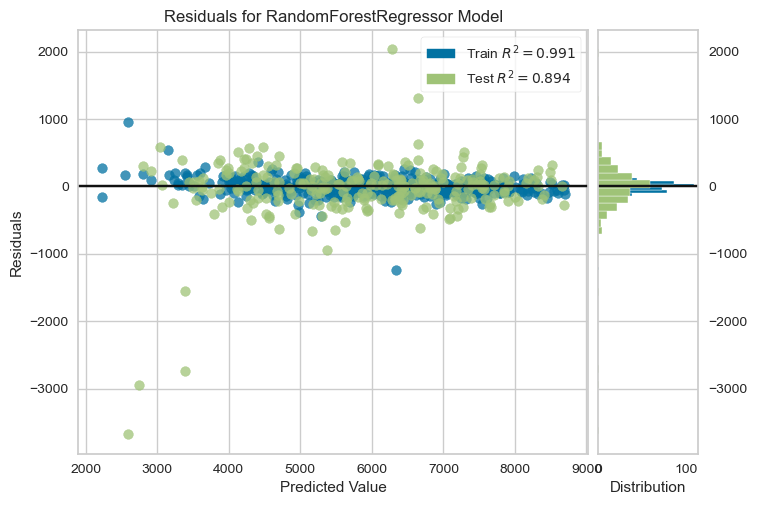

In [104]:
visualizer = ResidualsPlot(best_param_model)
visualizer.fit(X_train_fs, y_train)
visualizer.score(X_test_fs, y_test)
visualizer.show()  
plt.show()

# <span style="font-family:cursive;text-align:center">Model Explainability (Explainable AI)</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

we have two models `RF1` and `best_model_v0` which is random forest and xgboost trained on the test set. we will visualize the model behavior and explainability.

[Shap Tree Explainer](https://shap.readthedocs.io/en/stable/example_notebooks/tabular_examples/tree_based_models/Fitting%20a%20Linear%20Simulation%20with%20XGBoost.html) has the code docs

In [105]:
shap.initjs()

In [107]:
# in the above cells, fit the model with the returned params from the gsearchCV
# and then passit to the shap arguements

fs_rf = SelectKBest(score_func=mutual_info_regression, k=7)
fs_rf.fit(X_train,y_train)
X_train_rf = fs_rf.transform(X_train)
X_test_rf = fs_rf.transform(X_test)
rf_final = RandomForestRegressor(max_depth = 15, min_samples_split = 2, criterion = 'squared_error')

rf_final.fit(X_train_rf, y_train)
rf_pred = rf_final.predict(X_test_rf)

In [108]:
print(mean_absolute_error(y_test, rf_pred))
print(np.sqrt(mean_squared_error(y_test, rf_pred)))


247.80382665331132
460.50706294552543


In [109]:
# fs.get_support() will return boolean values in a list, with True at the 'k' specific selected features

feature_columns = [X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]]
feature_columns

['clonesize',
 'bumbles',
 'andrena',
 'osmia',
 'AverageOfUpperTRange',
 'AverageOfLowerTRange',
 'AverageRainingDays']

In [110]:
# using the above line of code to create a dataframe
# fs.transform will return the np.array() values and fs.get_support() will have the columns

pd.DataFrame(X_test_rf, columns=[X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

clonesize  bumbles  andrena  osmia  AverageOfUpperTRange  \
0         12.5     0.38     0.38   0.63                  79.0   
1         25.0     0.25     0.38   0.75                  79.0   
2         25.0     0.38     0.38   0.63                  64.7   
3         25.0     0.38     0.50   0.63                  79.0   
4         12.5     0.38     0.50   0.50                  64.7   
..         ...      ...      ...    ...                   ...   
252       25.0     0.25     0.63   0.63                  64.7   
253       25.0     0.25     0.38   0.75                  58.2   
254       25.0     0.25     0.25   0.38                  64.7   
255       25.0     0.25     0.25   0.25                  79.0   
256       25.0     0.25     0.38   0.63                  64.7   

     AverageOfLowerTRange  AverageRainingDays  
0                    55.9                0.10  
1                    55.9                0.26  
2                    45.8                0.56  
3                    55.9                0.56  
4                    45.8                0.10  
..                    ...                 ...  
252                  45.8                0.26  
253                  41.2                0.56  
254                  45.8                0.10  
255                  55.9                0.39  
256                  45.8                0.26  

[257 rows x 7 columns]

In [111]:
# Creating dataframe for test set of attributes, so that feature columns can be visible in the plot

X_test_rf_df = pd.DataFrame(X_test_rf, columns=[X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

shap_values = shap.TreeExplainer(rf_final).shap_values(X_test_rf_df)
shap_interaction_values = shap.TreeExplainer(rf_final).shap_interaction_values(X_test_rf_df)

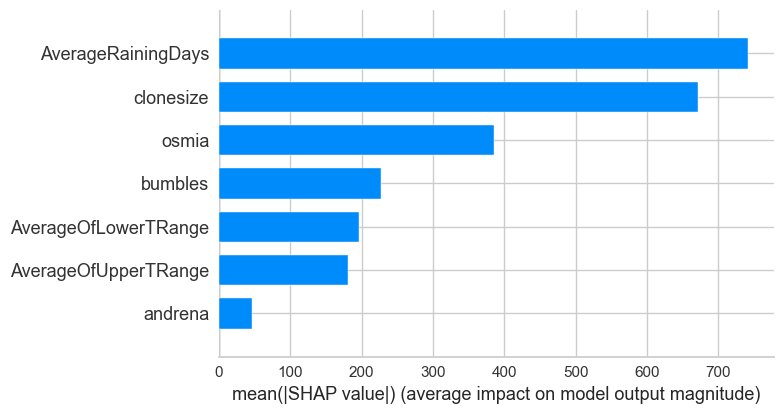

In [112]:
# summary plot of XGB test set as the impact value
shap.summary_plot(shap_values, X_test_rf_df, plot_type="bar")

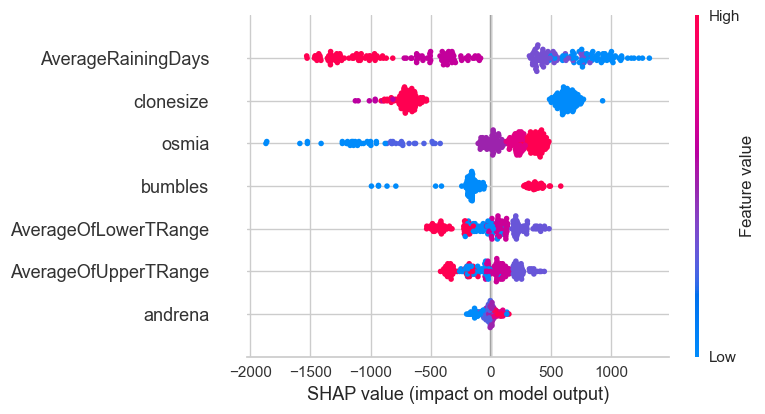

In [113]:
# BeeSwarm plot of the features based on impact on specific values

shap.summary_plot(shap_values, X_test_rf_df)

In [114]:
shap.initjs()

shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values[50,0:-3], X_test_rf_df.iloc[50,0:-3])

In [115]:
shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values[0:257,:], X_test_rf_df.iloc[0:257,:])

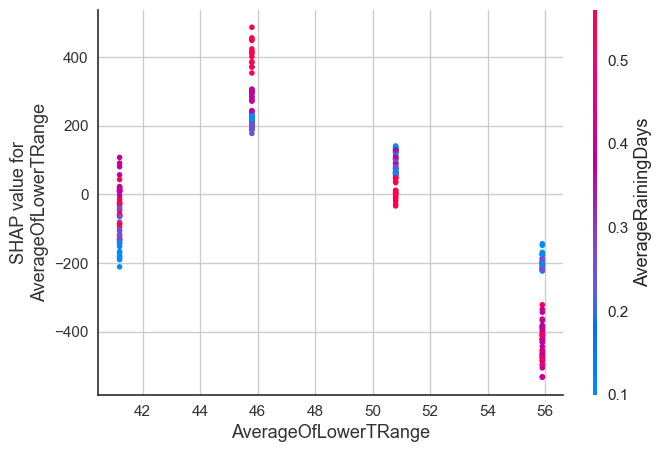

In [116]:
shap.dependence_plot(5, shap_values, X_test_rf_df) # should be 1-7 as we have 8 features

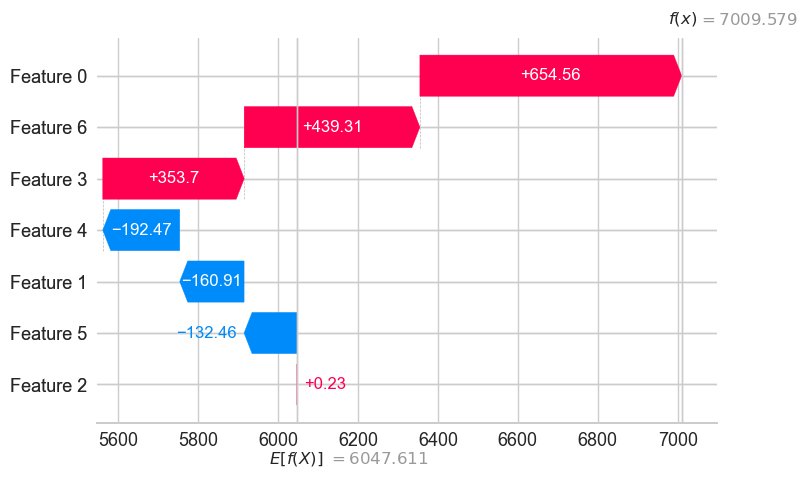

In [117]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf_final).expected_value[0], shap_values[row])

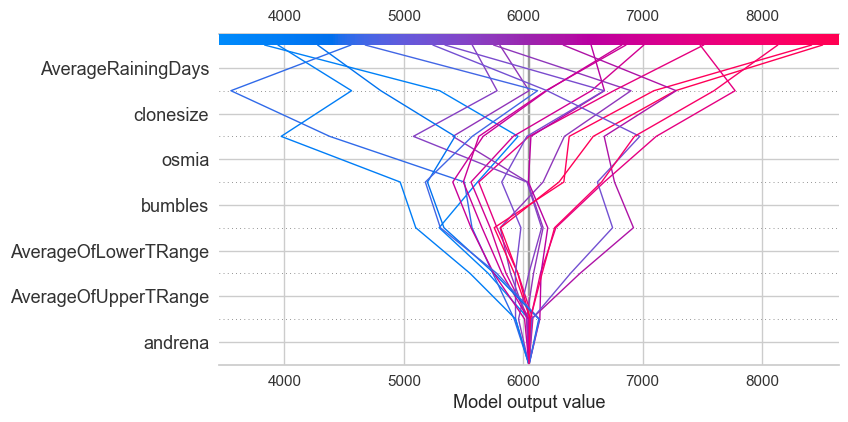

In [130]:
shap.decision_plot(shap.TreeExplainer(rf_final).expected_value[0], shap_values[110:130], feature_columns)

# <span style="font-family:cursive;text-align:center">Saving Models and Backup Objects</span>

In [131]:
# Save best grid search pipeline to file
dump_file_name = 'lreg_bbry_tuned_model.pkl'
joblib.dump(best_model_v0, dump_file_name, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % (best_model_name_v0, dump_file_name))
    
# Save the random forest grid search pipleline for backup
dump_file_name1 = 'rf_bbry_tuned_model.pkl'
joblib.dump(rf_final, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved Decision Tree tuned model to directory by name: lreg_bbry_tuned_model.pkl

Saved Random Forest tuned model to directory by name: rf_bbry_tuned_model.pkl


In [132]:
# # Save feature selection objects for backup
joblib.dump(fs_rf, "rf_fs_object.joblib", compress=1)
print("\n Saved %s to %s" % ("Randomforest fs object", "rf_fs_object.joblib"))


X_test_rf_df.to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

joblib.dump(X_train_rf, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")



 Saved Randomforest fs object to rf_fs_object.joblib

Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [133]:
pd.read_csv("X_test_rf_df.csv", index_col=0).iloc[110].values

array([25.  ,  0.38,  0.5 ,  0.75, 79.  , 55.9 ,  0.56])

In [134]:
# # Save the target test set
joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file


<Figure size 900x1300 with 0 Axes>

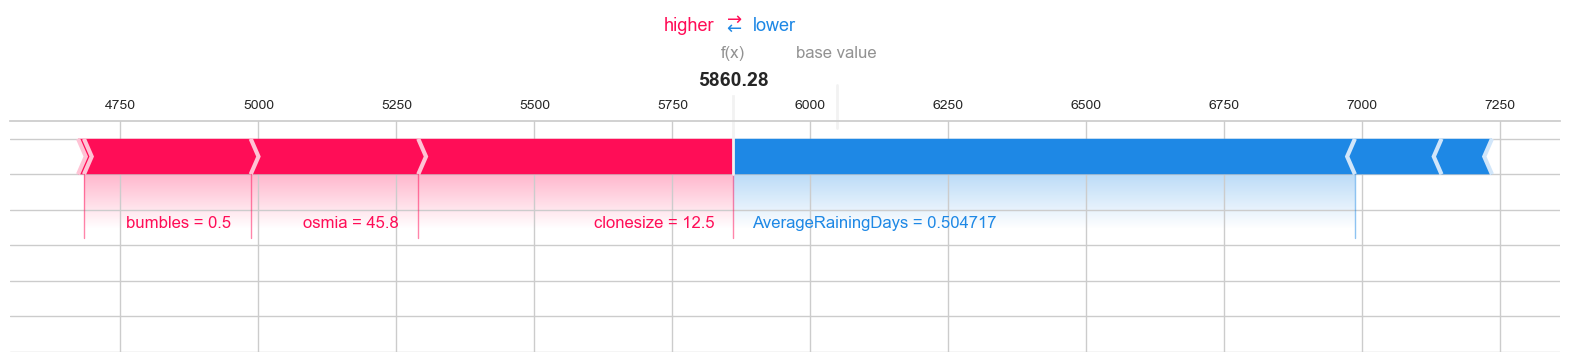

In [135]:
# # Saving png plot image. bbox_inches='tight' will prevent cropping the image

plt.figure(figsize=(9,13))
shap.force_plot(shap.TreeExplainer(rf_final).expected_value, #pass the model
                shap.TreeExplainer(rf_final).shap_values(np.array([12.5, 0.50, 64.7, 45.8, 0.26, 0.611463, 0.504717, 42.508522]).reshape(1,-1)), #pass query, will give the prediction
                np.array([12.5, 0.50, 64.7, 45.8, 0.26, 0.611463, 0.504717, 42.508522]).reshape(1,-1),
                feature_names=feature_columns,
               show=False,
               matplotlib=True).savefig("test_force_plot1.png", bbox_inches = 'tight') # pass the query in form of dataframe